In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_tgt_g_salary_17-18')

In [3]:
wrs.dtypes

NAME           object
TGT/G         float64
TGT/G_rank    float64
salary          int64
dtype: object

In [4]:
wrs.head()

,NAME,TGT/G,TGT/G_rank,salary
0,Antonio Brown,11.6,1.5,17000000
1,DeAndre Hopkins,11.6,1.5,16200000
2,Larry Fitzgerald,10.1,4.5,11000000
3,Keenan Allen,9.9,6.0,11250000
4,Michael Thomas,9.3,7.0,1797000


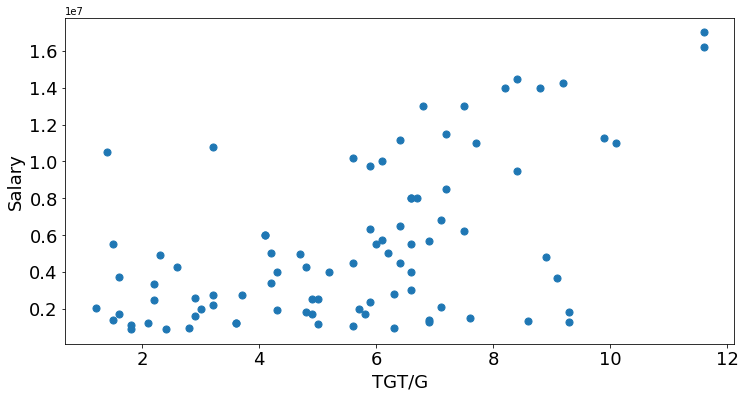

In [5]:
ax = wrs.plot(kind="scatter", x = 'TGT/G',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TGT/G', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['TGT/G', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.32716316e-16, -2.42462500e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.27796844, -0.63532568],
       [ 1.69527263,  2.06376749],
       [ 0.45039604,  1.03867975],
       [-0.0443431 , -0.35376081],
       [ 0.99550494, -0.79037012]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 4, 4, 1, 4, 4, 1, 4, 1, 2, 1, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 3, 4, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,TGT/G,TGT/G_rank,salary,clusters
0,Antonio Brown,11.6,1.5,17000000,1
1,DeAndre Hopkins,11.6,1.5,16200000,1
2,Larry Fitzgerald,10.1,4.5,11000000,1
3,Keenan Allen,9.9,6.0,11250000,1
4,Michael Thomas,9.3,7.0,1797000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.39565217e+00, 2.66224191e+06],
       [9.72500000e+00, 1.40251511e+07],
       [6.65625000e+00, 9.70963544e+06],
       [5.43666667e+00, 3.84760153e+06],
       [8.00000000e+00, 2.00952050e+06]])

In [14]:
wrs.groupby('clusters')[['TGT/G', 'salary']].mean()

,TGT/G,salary
clusters,,
0,2.395652,2.662242e+06
1,9.725000,1.402515e+07
2,6.656250,9.709635e+06
3,5.436667,3.847602e+06
4,8.000000,2.009520e+06


In [15]:
centroids = wrs.groupby('clusters')[['TGT/G', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

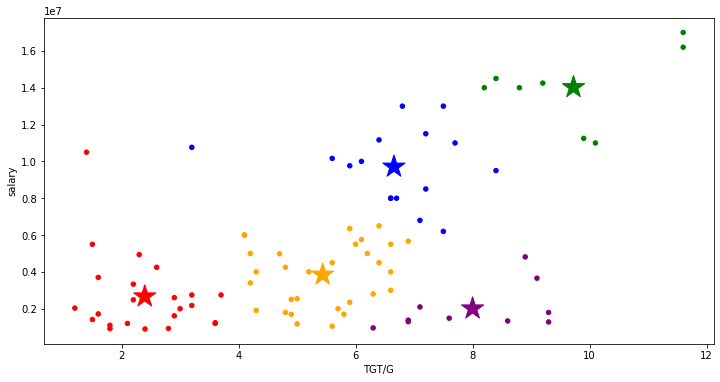

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

29.610012169540525

In [18]:
silhouette_score(X, km.labels_)

0.39765121058991115